# Primeiros passos com o aprendizado de máquina Conceitos e técnicas clássicas

## Conceitos Básicos
Big Data: Coleta e gerenciamento de grande quantidade de dados.
<br>Ciência de Dados: Coleta e analisa dados para extrair conhecimento.
<br>Machine learning: Investiga técnicas em que máquinas aprendem para resolver um problema.
<br>Mineração de Dados: Análise de dados para identificar features importantes.
<br>Redes Neurais: Modelos inspirados no cérebro humano que aprendem padrões a partir de dados.
<br>Deep Learning: Redes neurais mais camadas ocultas.

## Knowledge Discovery in Data (KDD)
Seleção: Escolher os dados relevantes para análise.
<br>Pré-processamento: Limpar e tratar dados inconsistentes ou ausentes.
<br>Transformação: Preparar e transformar os dados para mineração.
<br>Mineração de Dados: Aplicar técnicas para descobrir padrões e informações úteis.
<br>Interpretação/Evaluação: Analisar os padrões encontrados e extrair conhecimento.

## Aprendizado Supervisionado vs Não Supervisionado
Supervisionado: Os dados são rotulados para a classificação ou predição.<br>
&nbsp;&nbsp;- Redes Neurais<br>
&nbsp;&nbsp;- Naive Bayes<br>
&nbsp;&nbsp;- Regressão<br>
&nbsp;&nbsp;- Random Forest<br>
Não Supervisionado: O modelo aprende sozinho sem rótulos nos dados.<br>
&nbsp;&nbsp;- Redes Neurais<br>
&nbsp;&nbsp;- K-means

In [38]:
from sklearn.datasets import load_iris                #Carregar conjunto de dados do sklearn
from sklearn.model_selection import train_test_split  #Função de treinamento e teste

import matplotlib.pyplot as plt                       
import pandas as pd                                   
from pandas.plotting import parallel_coordinates      
import seaborn as sns                                 

from sklearn.tree import DecisionTreeClassifier, plot_tree  # Importar árvore de decisão
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.naive_bayes import GaussianNB            #Importar modelo Naive Bayes
from sklearn.neighbors import KNeighborsClassifier    #Importar modelo K-NN
from sklearn.linear_model import LogisticRegression   #Importar Regressão Logística

## Análise Exploratória

In [39]:
# Carregar dados
iris = load_iris(as_frame=True)       #Carregar dados de flores iris, do sklearn
df = iris.frame.rename(columns=(      #Renomeando as colunas para um nome mais legivel
    {
        'sepal length (cm)': 'sepal_length',
        'sepal width (cm)': 'sepal_width',
        'petal length (cm)': 'petal_length',
        'petal width (cm)': 'petal_width',
        'target': 'species'
    }
))

In [40]:
#imprimirndo o dataframe gerado com todos os dados
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [41]:
#relaciona o numero da especie com o respectivo nome
df['species_name'] = df['species'].map(dict(enumerate(iris.target_names)))
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [42]:
#plotando informações dobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
 5   species_name  150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [43]:
#apresenta alguns dados estatísticos sobre o dataframe
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [44]:
#pegando dados estatisticos manualmente

#media
media = df['petal_width'].mean()
print(media)
#mediana
mediana = df['petal_width'].median()
print(mediana)

#range (amplitude entre maximo e minimo)
amplitude = df['petal_width'].max() - df['petal_width'].min()
print(amplitude)

#variância
variancia = df['petal_width'].var()
print(variancia)

1.1993333333333336
1.3
2.4
0.5810062639821029


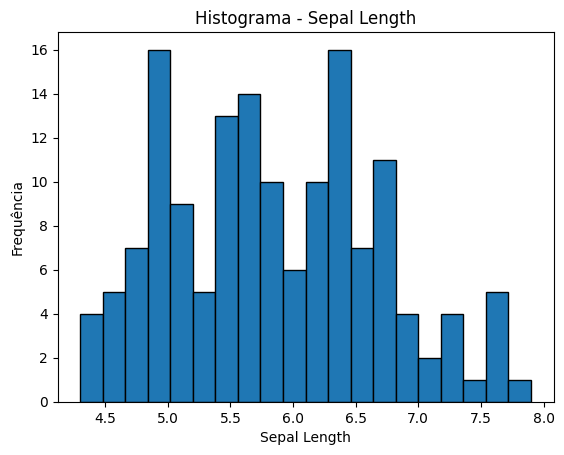

In [45]:
#histograma
plt.figure()
#kind - tipo histograma, bins - qntd de divisao de intervalos, edgecolor - cor das bordas
df['sepal_length'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Histograma - Sepal Length') #titulo do grafico
plt.xlabel('Sepal Length') #legenda do eixo x
plt.ylabel('Frequência') #legenda do eixo y
plt.show() #mostrar o grafico

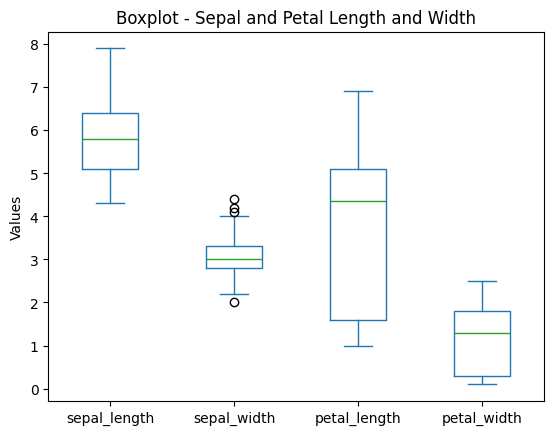

In [46]:
#Boxplot
#utilizado para identificar outliers (pontos fora do "padrão")
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].plot(kind='box')
plt.title('Boxplot - Sepal and Petal Length and Width')
plt.ylabel('Values')
plt.show()  

In [47]:
#mostra a correlação entre atributos (intervalo de 0 a 1)
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


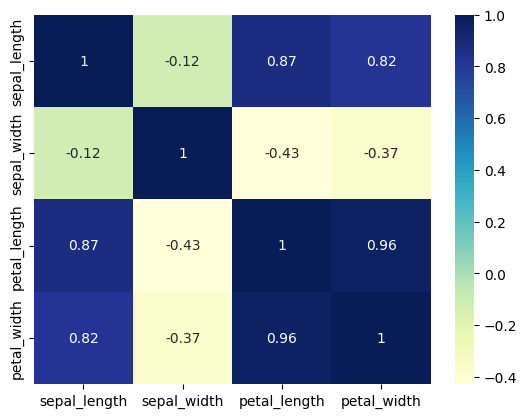

In [48]:
#mapa de calor da correlação
#annot - mostra os valores de cada frame, cmap - configuração de cor
sns.heatmap(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr(), annot=True, cmap='YlGnBu')
plt.show()

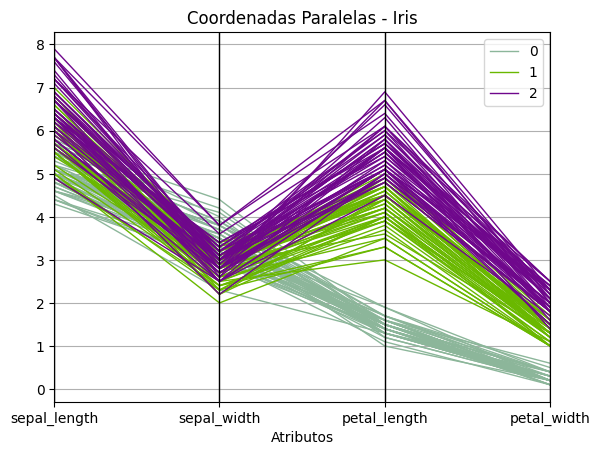

In [49]:
#coordenadas paralelas
#montamos o gráfico com as features e separamos por espécie (indicada pela cor)
parallel_coordinates(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']], 'species', linewidth=1.0)
plt.title('Coordenadas Paralelas - Iris')
plt.xlabel('Atributos')
plt.show()
#Podemos ver que o atributo que mais importa é a pétala, já que é mais visível a
#separação entre grupos diferentes (menos agrupados)

In [50]:
#features utilizadas para a predição
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
#indica o que se quer prever, nesse caso, a espécie 
y = df['species']

feature_names = x.columns.tolist()
target_names = iris.target_names.tolist()

#divide os dados em conjuto de treino e de teste
#test_size - indica a x% que vai para teste, nesse caso, 20% dos dados vao para teste e 80% para treino
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#printando o resultado dessa divisão
print(f'Treino: {x_train.shape} | Teste: {x_test.shape}')
print(f'Treino: {y_train.shape} | Teste: {y_test.shape}')

Treino: (120, 4) | Teste: (30, 4)
Treino: (120,) | Teste: (30,)


In [51]:
#printanto o conjunto para teste
x_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


## Decision Tree
Diagrama hierárquico de perguntas, onde cada resposta leva a um nó diferente. Ajuda a visualizar etapas e as decisões. Pode ser utilizada em clssificação e regressão.

<br>Vantagens: Fácil de Interpretar, pouca preparação dos dados, flexível.
<br>Desvantagens: Overfittin, alta variância (uma pequena mudança gera arvore diferentes), custo alto.

In [52]:
#"chamando" o modelo de Decision Tree
dt = DecisionTreeClassifier(random_state=42)

#treinamento
dt.fit(x_train, y_train)

#teste de predição
y_pred_dt = dt.predict(x_test)

#printando métricas
print(f'Acurácia: {round(accuracy_score(y_test, y_pred_dt), 4)}')
print('\nMatriz de confusão:')
print(confusion_matrix(y_test, y_pred_dt))
print('\nRelatório de classificação:')
print(classification_report(y_test, y_pred_dt, target_names=target_names))

Acurácia: 1.0

Matriz de confusão:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Relatório de classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



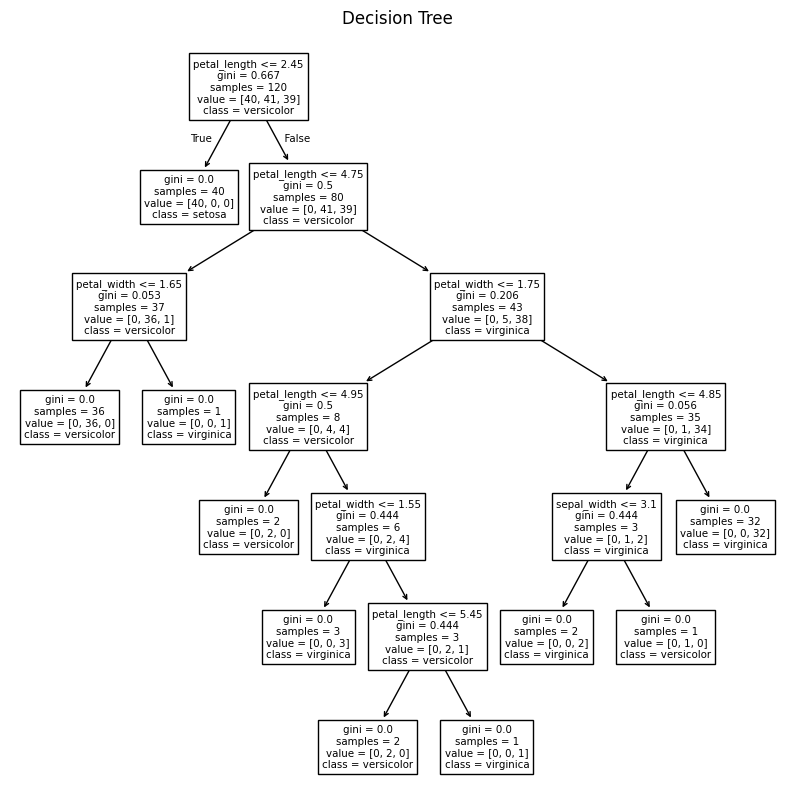

In [53]:
#verificar arvore de decisão
plt.figure(figsize=(10, 10)) #tamanho da figura
plot_tree(dt, feature_names=feature_names, class_names=target_names)
plt.title('Decision Tree')
plt.show()

## Random Forest
Utiliza várias Decision Tree (daí o nome Forest), para formar um resultado final. Para classificação, o resultado é por "votos" de cada árvore, para Regressão, o resultado final é a média de cada árvore.<br>

Ensemble: Várias técnicas aplicadas para refinar o resultado final.<br>
Bagging: Bootstrap (amostras de dados do conjunto com reposição) + Aggregating (combina as previsões de vários modelos).

Possui 3 parâmetros:<br>
&nbsp;&nbsp;- Tamanho dos nós<br>
&nbsp;&nbsp;- Número de Árvores<br>
&nbsp;&nbsp;- Número de características

Vantagens: Evita Overfitting, flexíivel, fácil de determinar impoprtância das features.<br>
Desvantagens: Processo demorado, exige mais recurso, mais difícil de interpretar.

In [54]:
#chama o modelo, n_estimators - numero de arvores
rf = RandomForestClassifier(n_estimators=200)

#treino
rf.fit(x_train, y_train)

#predição
y_pred_rf = rf.predict(x_test)

#métricas
print('Acurácia: ', round(accuracy_score(y_test, y_pred_dt), 4))
print('\nMatriz de confusão:')
print(confusion_matrix(y_test, y_pred_rf))
print('\nRelatório de classificação:')
print(classification_report(y_test, y_pred_rf, target_names=target_names))

Acurácia:  1.0

Matriz de confusão:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Relatório de classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Naive Bayes
Utilizado para classificação, utiliza princípios probabilísticos. Assume que todas as variáveis são independentes, uma variável não afeta a outra.

Vantagens: Menos complexo, boa escalabilidade, manipula dados de alta dimensão.<br>
Desvantagens: Suposição irrealista de independência, menos precisão que outros métodos.

In [55]:
#chama o modelo naive bayes gaussiano
nb = GaussianNB()

#treino
nb.fit(x_train, y_train)

#predição
y_pred_nb = nb.predict(x_test)

#métricas
print('Acurácia: ', round(accuracy_score(y_test, y_pred_dt), 4))
print('\nMatriz de confusão:')
print(confusion_matrix(y_test, y_pred_nb))
print('\nRelatório de classificação:')
print(classification_report(y_test, y_pred_nb, target_names=target_names))

Acurácia:  1.0

Matriz de confusão:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Relatório de classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



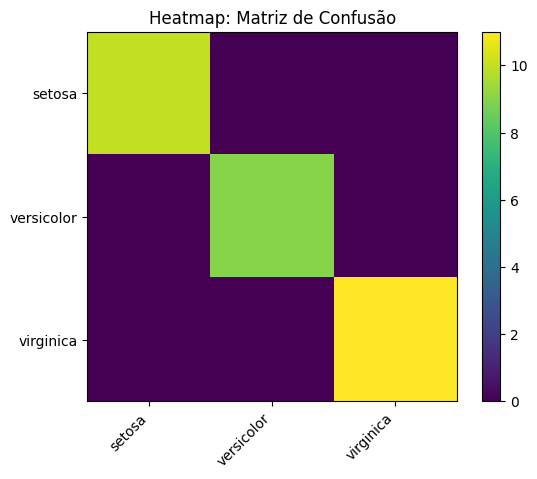

In [56]:
#criando um heatmap com a matriz de confusão
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title('Heatmap: Matriz de Confusão')
plt.colorbar() #mostra uma legenda de barra de cor
#define os frames,rotation - rotacao da legenda do eixo x, right - posicionamento da legenda
plt.xticks(range(len(target_names)), target_names, rotation=45, ha='right')
plt.yticks(range(len(target_names)), target_names)
plt.show()

## K Nearest Neighbors
Utiliza a proximidade entre os k vizinhos para a classificação, a classe com maior quantidade (dos k vizinhos) é o que determina a classificação.

Vantagens: Fácil de implementar, fácil de entender, poucos hiperparâmetros.<br>
Desvantagens: Escalabilidade ruim, problemas com dimensionalidade.

In [57]:
#chama o modelo knn, n_neighbors - numero de vizinhos que serão considerados
knn = KNeighborsClassifier(n_neighbors=3)

#treino
knn.fit(x_train, y_train)

#predição
y_pred_knn = knn.predict(x_test)

#métricas
print('Acurácia: ', round(accuracy_score(y_test, y_pred_knn), 4), '\n')
print('\nMatriz de confusão:')
print(confusion_matrix(y_test, y_pred_knn))
print('\nRelatório de Classificação:')
print(classification_report(y_test, y_pred_knn, target_names=target_names))

Acurácia:  1.0 


Matriz de confusão:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Regressão Logística
Utilizado para estimar a probabilidade de um evento (de 0 a 1). Porcentagem de pertencer a uma certa classe. Pode ser binária, multinominal ou ordinal.

Vantagens: Interpretação fácil, eficiente, adaptável para multiclasses.<br>
Desvantagens: Precisa ser balanceada.

In [58]:
#chama o modelo de regrssao logística, max_iter - maximo de iterações
log = LogisticRegression(max_iter=200)

#treino
log.fit(x_train, y_train)

#predição
y_pred_log = log.predict(x_test)

#métricas
print('Acurácia: ', round(accuracy_score(y_test, y_pred_log), 4))
print('\nMatriz de confusão:')
print(confusion_matrix(y_test, y_pred_log))
print('\nRelatório de Classificação:')
print(classification_report(y_test, y_pred_log, target_names=target_names))

Acurácia:  1.0

Matriz de confusão:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

